# Exploratory analysis of the HHL linear solver

## Implementation in `qiskit`

`qiskit` has an implementation of the hhl algorithm.
It can be imported using:

In [35]:
from qiskit.algorithms.linear_solvers.hhl import HHL

## A minimal example

This example is based on `qiskit` [documentation](https://github.com/Qiskit/qiskit-terra/blob/5b166c05182ca3c062106d08a9610ac246aa3e83/qiskit/algorithms/linear_solvers/hhl.py#L65).
We'll start by importing other dependences:

In [36]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.algorithms.linear_solvers.matrices import TridiagonalToeplitz
from qiskit.algorithms.linear_solvers.observables import MatrixFunctional

### Problem posing

In [37]:
matrix = TridiagonalToeplitz(num_state_qubits=2, 
                             main_diag=1, 
                             off_diag=1/3, 
                             trotter_steps=2)

right_hand_side = [1.0, -2.1, 3.2, -4.3] # Right hand side of the equation
rhs = right_hand_side / np.linalg.norm(right_hand_side) # Normalized right hand side

observable = MatrixFunctional(main_diag=1, off_diag=1/2)

### Circuit design

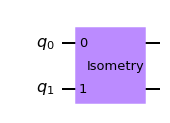

In [38]:
# Create the circuit
num_qubits = matrix.num_state_qubits
qc = QuantumCircuit(num_qubits)
qc.isometry(rhs, list(range(num_qubits)), None) # Set right hand side

qc.draw(output='mpl')

### Apply the HHL algorithm

In [39]:
hhl = HHL()
solution = hhl.solve(matrix, qc, observable)
approx_result = solution.observable

print(approx_result)

0.9332417131212032
